# Exercise 3: Classification using MLP 

In this exercise student familiarize the neural network classification problem.
The purpose is use MLP classification in Penguin  Dataset to classify different species just like in the Iris dataset. The dataset contains measurement of 3 different species of penguins coming from 3 islands in the Palmer Archipelago. These three classes are Adelie, Chinstrap, and Gentoo. If ‘Gentoo’ sounds familiar that is because Gentoo Linux is named after it! Also, these datasets contain culmen dimensions for each species. The culmen is the upper ridge of a bird’s bill. 

Columns in dataset:
- species a factor denoting penguin species (Adélie, Chinstrap and Gentoo)
- island a factor denoting island in Palmer Archipelago, Antarctica (Biscoe, Dream or Torgersen)
- bill_length_mm a number denoting bill length (millimeters)
- bill_depth_mm a number denoting bill depth (millimeters)
- flipper_length_mm an integer denoting flipper length (millimeters)
- body_mass_g an integer denoting body mass (grams)
- sex a factor denoting penguin sex (female, male)

Scatter plots of features can be found [Github](https://github.com/allisonhorst/palmerpenguins)

More information about the dataset:
[Penguin dataset on Kaggle](https://www.kaggle.com/parulpandey/palmer-archipelago-antarctica-penguin-data/version/1)

Dataset can be found from Moodle: penguins_size.csv


In [1]:
# Import libraries and dataset

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

df = pd.read_csv('data\penguins_size.csv')
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [2]:
# Data examination (You can do as you want)

df['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [3]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [4]:
df[df.isna().any(axis=1)]

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [5]:
df.dropna(inplace = True)
df['species'].value_counts()

Adelie       146
Gentoo       120
Chinstrap     68
Name: species, dtype: int64

In [6]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [7]:
# The categorical variables would have object or category datatype

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 334 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            334 non-null    object 
 1   island             334 non-null    object 
 2   culmen_length_mm   334 non-null    float64
 3   culmen_depth_mm    334 non-null    float64
 4   flipper_length_mm  334 non-null    float64
 5   body_mass_g        334 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.9+ KB


In [8]:
# check category values and drop the ones that don't fall in a wanted category

print(df['species'].unique())
print(df['island'].unique())
print(df['sex'].unique())

df.loc[df['sex'] == '.']
df = df.loc[df['sex'] != '.'].copy()
# df.info()

print(df['sex'].unique())

df.reset_index(drop = True, inplace = True)

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']
['MALE' 'FEMALE']


In [9]:
df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [10]:
# Categorical varibles: Encode columns Species, Island and Sex
# species = Adélie, Chinstrap and Gentoo
# sex = MALE, FEMALE
# island = Torgersen, Biscoe and Dream


# categorical encoding for the labels

df['species'] = pd.Categorical(df['species'])
df['species'] = df['species'].cat.codes

# dummy encoding (drop_first = True) to avoid dummy variable traps
df_dummies = pd.get_dummies(df, prefix = {'sex': 'sex',
                                       'island': 'island'},
                         drop_first = True)

print(df_dummies.shape)

(333, 8)


In [11]:
df_dummies.head(5)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,0,39.1,18.7,181.0,3750.0,0,1,1
1,0,39.5,17.4,186.0,3800.0,0,1,0
2,0,40.3,18.0,195.0,3250.0,0,1,0
3,0,36.7,19.3,193.0,3450.0,0,1,0
4,0,39.3,20.6,190.0,3650.0,0,1,1


In [12]:
# Features = island, culmen_length_mm, culmen_depth_mm, flipper_length_mm, body_mass_g & sex
# Label = species

y = np.array(df_dummies[['species']])
X = np.array(df_dummies[df_dummies.columns.drop('species')])

# Dataset splitting
# training set 80%
# test set 20%

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.2)

# Using from_tensor_slices -function convert Numpy-tables to TensorFlow's Dataset class
# https://towardsdatascience.com/how-to-use-dataset-in-tensorflow-c758ef9e4428
train_dataset = tf.data.Dataset.from_tensor_slices((Xtrain, ytrain))
test_dataset = tf.data.Dataset.from_tensor_slices((Xtest,ytest))

# Define the batch size
train_dataset,test_dataset = train_dataset.batch(1), test_dataset.batch(1)

In [13]:
# shapes just to help me keep track

print("Training Input shape\t: {}".format(Xtrain.shape))
print("Testing Input shape\t: {}".format(Xtest.shape))
print("Training Output shape\t: {}".format(ytrain.shape))
print("Testing Output shape\t: {}".format(ytest.shape))

Training Input shape	: (266, 7)
Testing Input shape	: (67, 7)
Training Output shape	: (266, 1)
Testing Output shape	: (67, 1)


In [14]:
%load_ext tensorboard

## Clear any logs from previous runs
# rm -rf ./ex3_logs/ #invalid syntax 
## workaround, jos haluaa aloittaa tyhjältä pöydältä: 
## tapa prosessessi, poista logit ylläolevasta kansiosta ja tyhjennä %AppData%/Local/Temp/.tensorboard-info sisältö

In [15]:
# Define neural network using Keras Function API
# Input layer
# Hidden layers  
# Output layer 

def create_model():
    return keras.Sequential(
    [
        layers.Dense(7, input_shape = (Xtrain.shape[1], )), # here same as: input_shape = (7, )
        layers.Dense(80, activation = 'relu'),
        layers.Dense(3, activation = 'softmax'),
    ]
)

model = create_model()

# Print the structure of model: model.summary()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 56        
_________________________________________________________________
dense_1 (Dense)              (None, 80)                640       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 243       
Total params: 939
Trainable params: 939
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Compile with following parameters
# optimizer= adam 
# loss= sparse_categorical_crossentropy
# metrics= accuracy

model.compile(loss='sparse_categorical_crossentropy', # Loss
              optimizer='adam', # Adam optimizer with default parameters
              metrics=['accuracy'] # Accuracy is used in classification problems. 
             )

In [17]:
import datetime
log_dir = "ex3_logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [18]:
# Fit model with 
# epochs: test with different amout of epoch and write down the accurary
# I am using Tensorboard here just to quickly avoid having to train several times for different amounts of epochs

model.fit(train_dataset, validation_data = test_dataset, epochs=200, verbose = 0, callbacks = [tensorboard_callback]) 


Instructions for updating:
use `tf.profiler.experimental.stop` instead.


In [19]:
%tensorboard --logdir ex3_logs/fit

Reusing TensorBoard on port 6006 (pid 18116), started 0:13:48 ago. (Use '!kill 18116' to kill it.)

In [20]:
# Evaluate()
# Implementation comes this cell
# Training of the model is not stopped at optimal point, but goes through the same amount of epochs. 
# I considered implementing model checkpoint, to stop the training, but decided against it to keep this exercise simple.

results = model.evaluate(test_dataset)
print(results)
print(f"Accuracy in percents: {results[1]*100:.0f}%")

67/67 [==============================] - 0s 682us/step - loss: 0.0734 - accuracy: 0.9701
[0.073391854763031, 0.9701492786407471]
Accuracy in percents: 97%


__Conclusion__

Questions
- How number of nodes in hidden layer affects the results?
- How the number of epochs affects the results?

Conclusions
- 10: Steady, but decelerating rate. Very noisy.
- 20: Less steady, would like to see more epochs. Validation data overshoots especially at low epochs.
- 40: Fairly consistant at low epochs, validation undershoots. Would like to see more epochs.
- 80: Seems to reach kind of plateau around 90 epochs. Validation data variability descreases around 160-200 epochs.
- Second hidden layer doesn't bring more value in this case. There is lot of discontinuity. Different combinations could be explored.

With 10 nodes in one hidden layer:
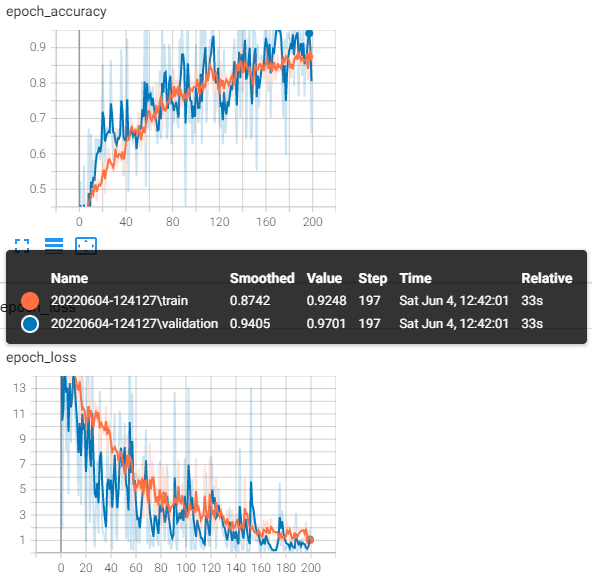

With 20 nodes in one hidden layer:
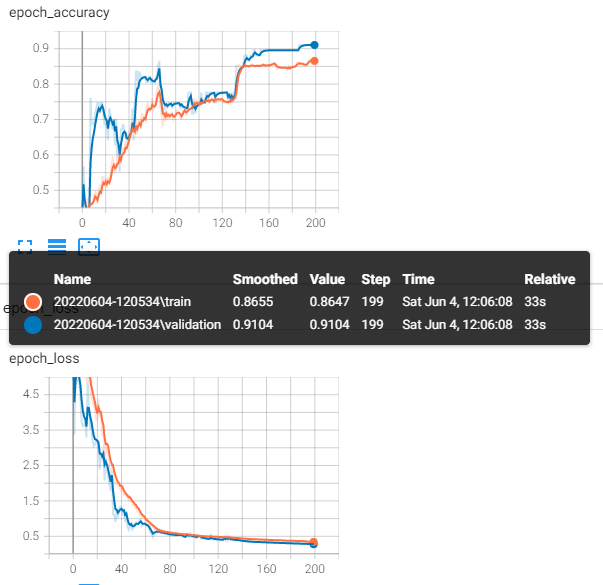

With 40 nodes in one hidden layer:
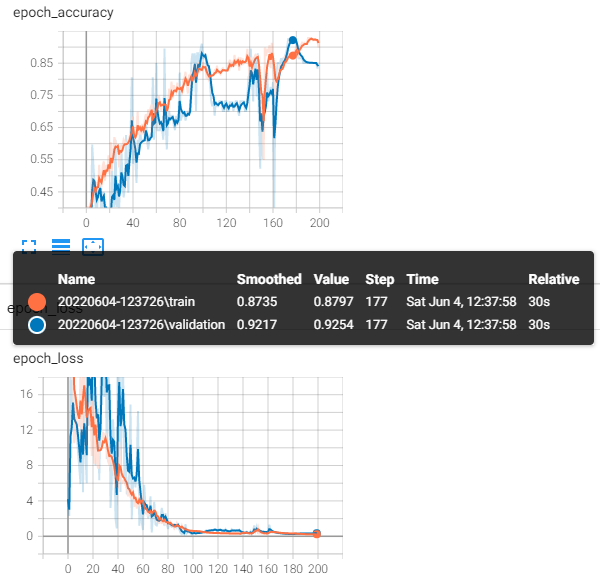

With 80 nodes in one hidden layer:
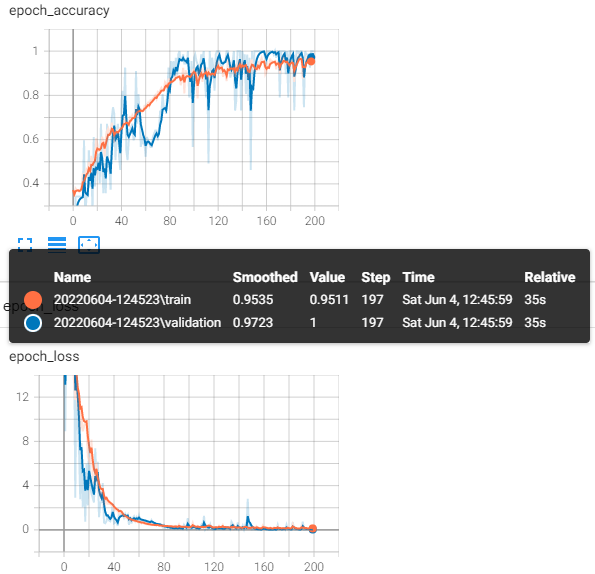

With 20 nodes in the first hidden layer and 10 nodes on the second hidden layer:
![image-5.png](attachment:image-5.png

With 20 nodes in the first hidden layer and 20 nodes on the second hidden layer:
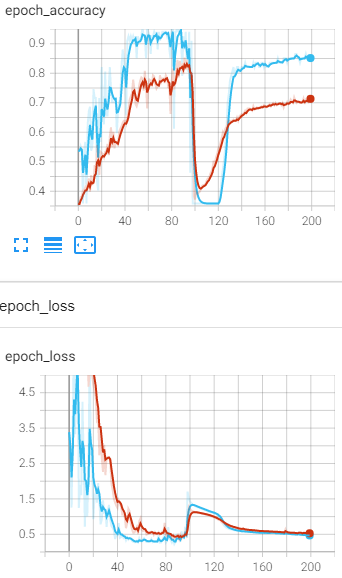

With 20 nodes in the first hidden layer and 40 nodes on the second hidden layer:
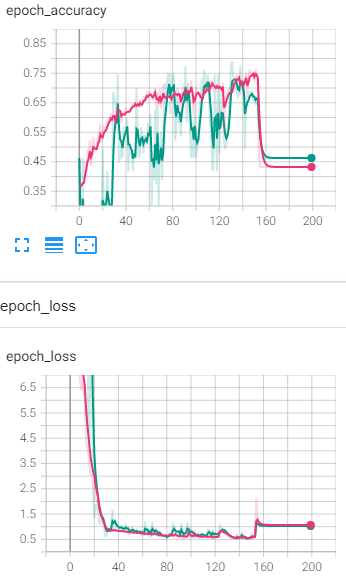

With 20 nodes in the first hidden layer and 80 nodes on the second hidden layer:
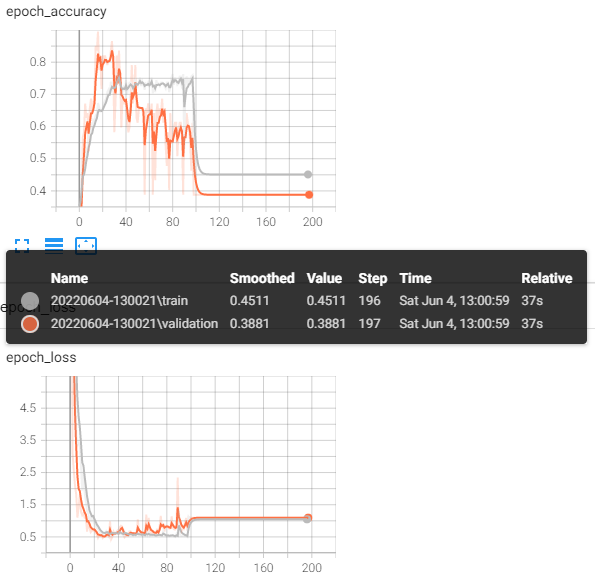


In [ ]:
# I will not use Scikit's OneHotEncoder because I want the the encoded data to have variable names

# from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Categorical varibles: Encode columns Species, Island and Sex
# species = Adélie, Chinstrap and Gentoo
# sex = MALE, FEMALE
# island = Torgersen, Biscoe and Dream

# Create the OneHotEncoder object
# parameter drop = ‘first’ will handle dummy variable traps -> uses dummy encoding instead of onehotencoding
#   https://www.geeksforgeeks.org/ml-dummy-variable-trap-in-regression-models/)
#   https://towardsdatascience.com/encoding-categorical-variables-one-hot-vs-dummy-encoding-6d5b9c46e2db
# onehotencoder = OneHotEncoder(sparse=False, handle_unknown='error',drop='first')

# Perform OneHotEncoding to a column called "Species" using onehotendoder object fit and tranform
# onehotencoder_df = pd.DataFrame(onehotencoder.fit_transform(df[["species"]]))
# onehotencoder_df

In [ ]:
## Scaling - I decided not scale in this exercise, as it seems to be introduced in later exercises
# scaler = preprocessing.StandardScaler()
# Xscaled = scaler.fit_transform(X)

# scalery = preprocessing.StandardScaler()
# yscaled = scalery.fit_transform(y)

# trainprediction = scalery.inverse_transform(model.predict(Xtrain))
# testprediction = scalery.inverse_transform(model.predict(Xtest))

## After the predictions the scaled versions of the input variables are no longer needed. So let's scale them back.
# Xtrain = scaler.inverse_transform(Xtrain)
# Xtest = scaler.inverse_transform(Xtest)

# ytrain = scalery.inverse_transform(ytrain)
# ytest = scalery.inverse_transform(ytest)

In [ ]:
# https://machinelearningmastery.com/how-to-stop-training-deep-neural-networks-at-the-right-time-using-early-stopping/
# mc = ModelCheckpoint('ex3_best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [ ]:
# print('Accuracy in train data %.2f'
#       % accuracy_score(np.argmax(ytrain, axis = 1), trainprediction))

# print('Accuracy in test data %.2f'
#       % accuracy_score(np.argmax(ytest, axis = 1), testprediction))

In [ ]:
# talteen

# df.corr(method='pearson')

with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    display(df)